#Stochastic Gradient Descent(SGD)

In [0]:
%matplotlib inline
from fastai.basics import *

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [0]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.9321,  1.0000],
        [-0.3111,  1.0000],
        [-0.9970,  1.0000],
        [-0.8549,  1.0000],
        [ 0.6464,  1.0000]])

In [0]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)
y

tensor([ 5.5378,  1.4022, -0.1411,  0.1007,  4.0126, -0.1895,  3.8859,  4.6023,
         4.4121,  2.1416,  5.4656, -0.1617, -0.6978,  2.6689,  1.8776,  4.3896,
         1.0939,  0.6678,  3.2290,  1.2499,  2.9845,  0.3936,  0.0062,  0.8607,
         0.0375, -0.3973,  1.5371,  3.1894,  3.7531,  0.4066,  5.2420,  5.3216,
         5.1101,  3.5990,  2.3825, -0.3646,  0.2285,  3.2715,  2.7352,  3.5594,
         1.4687,  3.2357,  2.9238,  3.1519,  0.9643,  0.3705,  2.1762,  5.6701,
         0.1728,  0.8295,  2.0613,  5.7213,  2.1318,  3.8344,  4.5692,  3.4631,
         1.7943,  4.5183,  3.6242,  2.4534,  1.1356,  2.1258, -0.0662,  2.1495,
         0.2994,  1.8083, -0.4102,  1.6124,  1.8446,  1.7751,  4.9215,  1.2001,
         3.0203,  1.0937,  5.0670,  2.3583,  0.7168,  4.1913,  3.3874, -0.2679,
         2.4556,  4.0739,  0.9264,  0.4493,  5.2689, -0.7470,  1.8452,  1.6911,
         4.0326,  0.6343,  0.9137,  4.8358,  4.8228,  1.0475, -0.5270,  4.8375,
         4.4801,  3.5562,  3.0674,  1.24

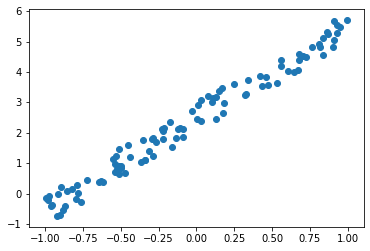

In [0]:
plt.scatter(x[:,0], y);

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [0]:
a = tensor(-1.,1)

In [0]:
y_hat = x@a
mse(y_hat, y)

tensor(7.3545)

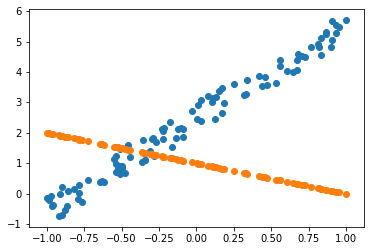

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.


In [0]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [0]:
lr = 1e-1
for t in range(100): update()

tensor(7.3545, grad_fn=<MeanBackward0>)
tensor(1.4738, grad_fn=<MeanBackward0>)
tensor(0.3983, grad_fn=<MeanBackward0>)
tensor(0.1548, grad_fn=<MeanBackward0>)
tensor(0.0990, grad_fn=<MeanBackward0>)
tensor(0.0862, grad_fn=<MeanBackward0>)
tensor(0.0833, grad_fn=<MeanBackward0>)
tensor(0.0826, grad_fn=<MeanBackward0>)
tensor(0.0825, grad_fn=<MeanBackward0>)
tensor(0.0824, grad_fn=<MeanBackward0>)


In [0]:
x = x.detach().numpy()

In [0]:
y_hat = x@a
y_hat


tensor([ 5.2791,  1.5588, -0.4936, -0.0685,  4.4240, -0.4475,  3.7491,  4.5177,
         4.5104,  2.2208,  5.3330,  0.1166, -0.2059,  3.0081,  2.2272,  4.1544,
         1.4647,  1.0719,  2.7192,  0.8923,  3.0385,  0.6505, -0.2444,  0.9993,
         0.1490, -0.3940,  2.0091,  2.8870,  3.5113,  0.6106,  5.0854,  5.0763,
         4.9864,  3.2356,  2.5812, -0.3691, -0.1927,  3.4735,  2.3982,  3.9009,
         0.9633,  3.4435,  2.5186,  2.8134,  0.8764,  0.5599,  1.8461,  5.2062,
         0.0384,  0.9238,  1.8311,  5.4717,  1.8094,  3.8603,  4.9864,  3.0026,
         1.8303,  4.6039,  4.0873,  2.4977,  0.8486,  2.1276, -0.4236,  2.1746,
         0.1377,  1.6117, -0.1002,  1.1312,  1.6325,  1.4292,  4.9114,  1.1703,
         2.7983,  1.4638,  5.2072,  1.9671,  0.8782,  4.1667,  2.9435,  0.2011,
         2.8681,  4.4968,  0.9685,  0.3249,  5.2780, -0.2601,  2.0892,  1.6835,
         4.2981,  0.9629,  0.9941,  5.1891,  4.9377,  1.3965, -0.1464,  4.7729,
         4.6644,  3.7924,  2.5860,  1.63

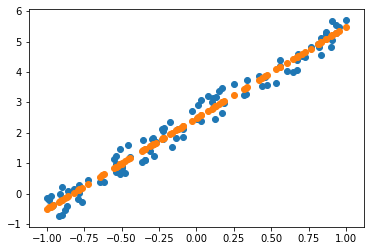

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],(x@a).detach());

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], (x@a).detach())
plt.close()

def animate(i):
    update()
    line.set_ydata((x@a).detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.